<a href="https://colab.research.google.com/github/RakeshBhugra/Stocks-with-Exogenous-Covid-Regressors/blob/main/AutoTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install auto_ts

     |████████████████████████████████| 51kB 3.0MB/s 
     |████████████████████████████████| 1.3MB 7.2MB/s 
     |████████████████████████████████| 962kB 40.0MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656592 sha256=63214daf5fc2360bb03c646fb6efc5b07c1c21916bc0bfea75ce2ef39e999795
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import auto_ts as AT

import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

Running Auto Timeseries version: 0.0.20...Call by using:
        auto_ts.Auto_Timeseries(traindata, ts_column,
                            target, sep,  score_type='rmse', forecast_period=5,
                            time_interval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None, model_type='stats',
                            verbose=1)
    To run three models from Stats, ML and FB Prophet, set model_type='best'
To remove previous versions, perform 'pip uninstall auto_ts'
To get the latest version, perform "pip install auto_ts --no-cache-dir --ignore-installed"


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stats/GLAXO.NS.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-30,1690.099976,1709.699951,1665.300049,1674.900024,1653.261841,32519
1,2020-01-31,1694.000000,1694.000000,1655.000000,1665.400024,1643.884644,30484
2,2020-02-03,1645.000000,1678.300049,1611.250000,1646.349976,1625.080688,50313
3,2020-02-04,1520.000000,1522.000000,1425.050049,1447.550049,1428.848999,342618
4,2020-02-05,1434.099976,1538.800049,1365.000000,1376.500000,1358.716919,614869
...,...,...,...,...,...,...,...
196,2020-11-12,1442.000000,1468.750000,1413.000000,1430.250000,1430.250000,90183
197,2020-11-13,1427.000000,1435.000000,1410.000000,1428.349976,1428.349976,47680
198,2020-11-17,1450.000000,1454.349976,1432.500000,1444.050049,1444.050049,37928
199,2020-11-18,1442.000000,1449.050049,1421.000000,1429.000000,1429.000000,19728


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'Date':'date'}, inplace=True)

In [ ]:
df.head()

,date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-30,1690.099976,1709.699951,1665.300049,1674.900024,1653.261841,32519
1,2020-01-31,1694.000000,1694.000000,1655.000000,1665.400024,1643.884644,30484
2,2020-02-03,1645.000000,1678.300049,1611.250000,1646.349976,1625.080688,50313
3,2020-02-04,1520.000000,1522.000000,1425.050049,1447.550049,1428.848999,342618
4,2020-02-05,1434.099976,1538.800049,1365.000000,1376.500000,1358.716919,614869


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       201 non-null    datetime64[ns]
 1   Open       201 non-null    float64       
 2   High       201 non-null    float64       
 3   Low        201 non-null    float64       
 4   Close      201 non-null    float64       
 5   Adj Close  201 non-null    float64       
 6   Volume     201 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 11.1 KB


In [ ]:
ec_df = df.set_index('date')

In [ ]:
ec_df.head()

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2020-01-30,1690.099976,1709.699951,1665.300049,1674.900024,1653.261841,32519
2020-01-31,1694.000000,1694.000000,1655.000000,1665.400024,1643.884644,30484
2020-02-03,1645.000000,1678.300049,1611.250000,1646.349976,1625.080688,50313
2020-02-04,1520.000000,1522.000000,1425.050049,1447.550049,1428.848999,342618
2020-02-05,1434.099976,1538.800049,1365.000000,1376.500000,1358.716919,614869


In [ ]:
ec_data = ec_df['Close']
ec_data.head()

date
2020-01-30    1674.900024
2020-01-31    1665.400024
2020-02-03    1646.349976
2020-02-04    1447.550049
2020-02-05    1376.500000
Name: Close, dtype: float64

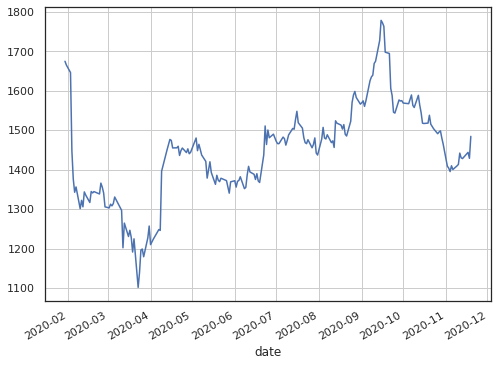

In [ ]:
ec_data.plot(grid=True)

In [ ]:
final_df = df.copy()

In [ ]:
final_df.head()

,date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-30,1690.099976,1709.699951,1665.300049,1674.900024,1653.261841,32519
1,2020-01-31,1694.000000,1694.000000,1655.000000,1665.400024,1643.884644,30484
2,2020-02-03,1645.000000,1678.300049,1611.250000,1646.349976,1625.080688,50313
3,2020-02-04,1520.000000,1522.000000,1425.050049,1447.550049,1428.848999,342618
4,2020-02-05,1434.099976,1538.800049,1365.000000,1376.500000,1358.716919,614869


In [ ]:
train = final_df[:191]
test = final_df[191:]
print(train.shape, test.shape)
train.head()

(191, 7) (10, 7)


,date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-30,1690.099976,1709.699951,1665.300049,1674.900024,1653.261841,32519
1,2020-01-31,1694.000000,1694.000000,1655.000000,1665.400024,1643.884644,30484
2,2020-02-03,1645.000000,1678.300049,1611.250000,1646.349976,1625.080688,50313
3,2020-02-04,1520.000000,1522.000000,1425.050049,1447.550049,1428.848999,342618
4,2020-02-05,1434.099976,1538.800049,1365.000000,1376.500000,1358.716919,614869


In [ ]:
ts_column = 'date'
sep = ','
target = 'Close'

Input is data frame. Performing Time Series Analysis
    Dataframe loaded successfully. Shape of data set = (191, 6)
    Target variable = Close
Time series input in days = 1
it is a Daily time series.

Running Facebook Prophet Model...
Preparing Time Series data for FB Prophet: sample row before
                   Close         Open  ...    Adj Close  Volume
date                                  ...                     
2020-01-30  1674.900024  1690.099976  ...  1653.261841   32519

[1 rows x 6 columns]
Time Series data: sample row after transformation
           ds            y         Open  ...          Low    Adj Close  Volume
0 2020-01-30  1674.900024  1690.099976  ...  1665.300049  1653.261841   32519

[1 rows x 7 columns]
    Fit-Predict data (shape=(191, 2)) with Confidence Interval = 0.95...


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Building Forecast dataframe. Forecast Period = 10


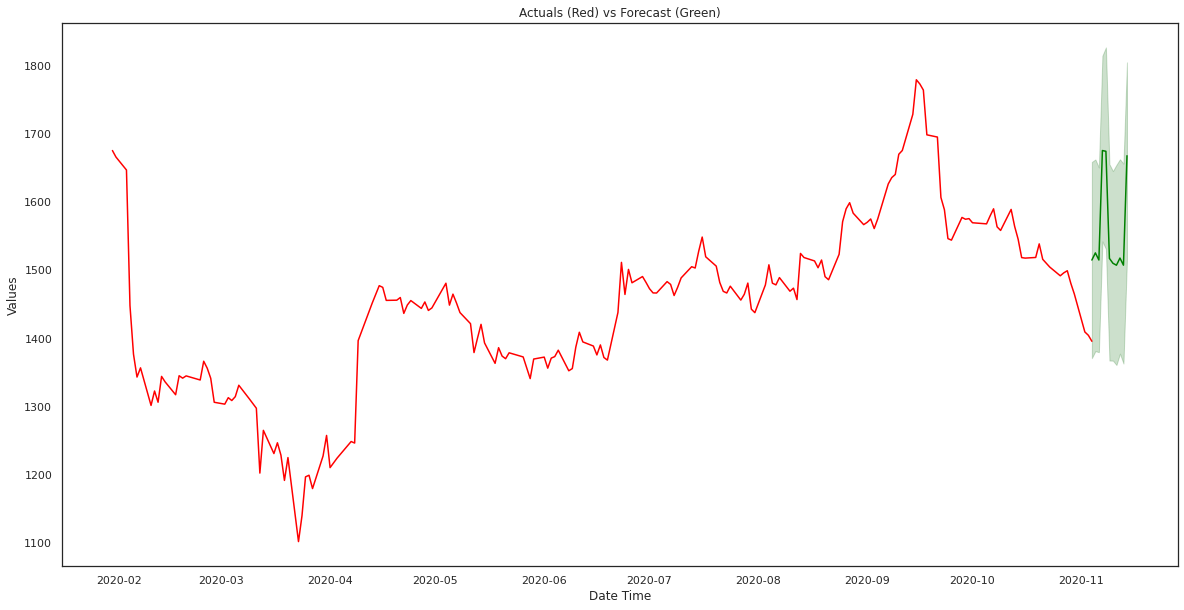

    RMSE = 119.01
    Std Deviation of Originals = 124.12
    Normalized RMSE = 96%

Running PyFlux Model...
Cycling through various (p,d,q) parameters

Best Params Selected (based on rmse): (3, 1, 3)
Dynamic 10-period Forecasts:
    RMSE = 66.71
    Std Deviation of Originals = 127.04
    Normalized RMSE = 53%

Running Non Seasonal ARIMA Model...

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 1, MA order q = 0, Interim metric = 1794.226

Differencing = 1
 Iteration 30 completed...
    Best AR order p = 2, MA order q = 2, Interim metric = 1779.083

Best model is: Non Seasonal ARIMA(2,1,2), aic = 1779.083
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
    ARIMA model error: predictions not available.

Running Seasonal SARIMAX Model...
Building a Non Seasonal Model...

Finding best Non Seasonal Parameters:

Differencing = 0
    Iteration 0 completed...
    Best AR order p = 1, MA order q = 3, Inte

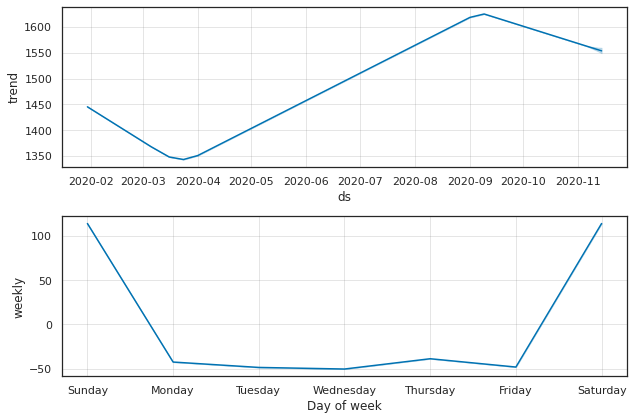

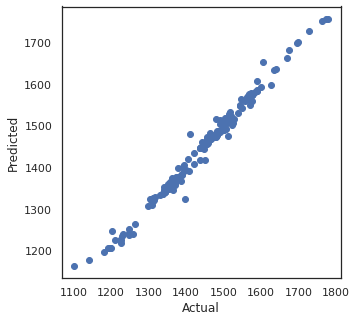

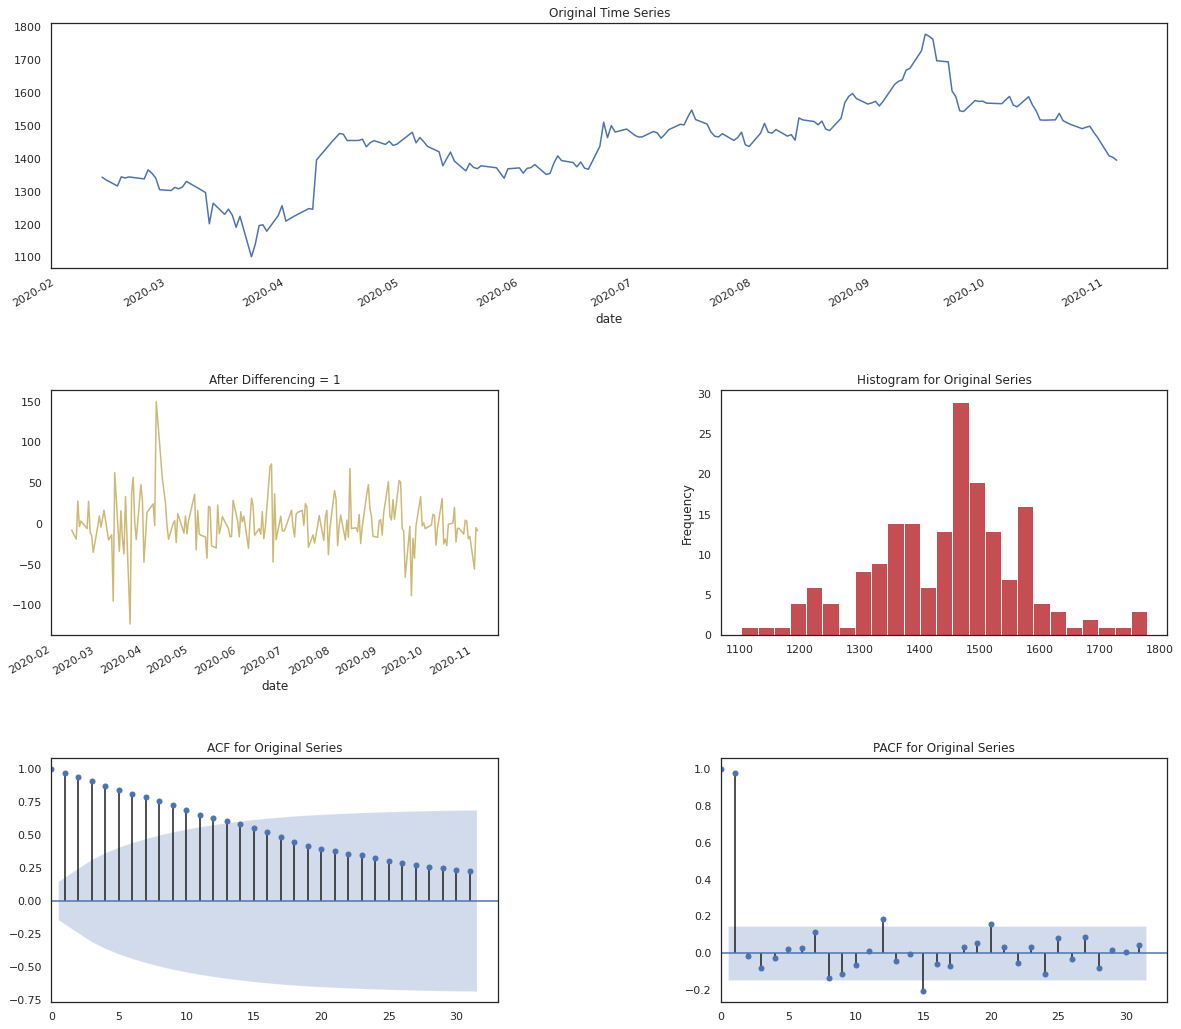


Best Model is:
    ML
    Best Model Forecasts: [1514.50499024 1518.7929883  1513.54798584 1491.636001   1490.6469971
 1516.45898688 1481.83399422 1481.27998788 1419.21998052 1404.8889722 ]
    Best Model Score: 28.18


In [ ]:
l_dict = AT.Auto_Timeseries(train, ts_column,
                            target, sep,  score_type='rmse', forecast_period=10,
                            model_type='best',
                            verbose=2)